# Results analysis

This notebook analysis the results gathered from the experiments, which are stored in these files:

* results_by_track.csv
* models/*-gpt2-_*/all_results.json

In [14]:
import numpy as np
import pandas as pd

In [40]:
results = pd.read_csv("../results_by_track.csv")
results.head()

,experiment,mse,rmse,mae,r2
0,danceability-xdg-100-probs-by_track,0.023679,0.153880,0.116560,0.383259
1,danceability-bayes-100-probs-by_track,0.025348,0.159212,0.124374,0.339778
2,danceability-baseline-100-probs-by_track,0.076357,0.276327,0.219899,-0.988784
3,acousticness-xdg-100-probs-by_track,0.066028,0.256959,0.184070,0.313688
4,acousticness-bayes-100-probs-by_track,0.068349,0.261436,0.200401,0.289565


In [84]:
# Create more columns based in the experiment type
results[['target', 'model', 'limit', 'input', 'dimension']] = results['experiment'].str.split('-', expand=True)
results.head()

,experiment,mse,rmse,mae,r2,target,model,limit,input,dimension
0,danceability-xdg-100-probs-by_track,0.023679,0.153880,0.116560,0.383259,danceability,xdg,100,probs,by_track
1,danceability-bayes-100-probs-by_track,0.025348,0.159212,0.124374,0.339778,danceability,bayes,100,probs,by_track
3,acousticness-xdg-100-probs-by_track,0.066028,0.256959,0.184070,0.313688,acousticness,xdg,100,probs,by_track
4,acousticness-bayes-100-probs-by_track,0.068349,0.261436,0.200401,0.289565,acousticness,bayes,100,probs,by_track
6,energy-xdg-100-probs-by_track,0.035426,0.188217,0.147648,0.363555,energy,xdg,100,probs,by_track


In [85]:
# remove the baseline data and leave it in a different dataset

baseline = results.loc[results.model == "baseline"]
results = results.loc[results.model != "baseline"]

In [103]:
# Define a function to group by dimensions and calculate MEAN and STD

def mean_std_by(dimension, columns=["rmse"]):
    grouped_by = results[columns + [dimension]].groupby(dimension)
    mean = grouped_by.mean()
    std = grouped_by.std()
    return mean, std

<AxesSubplot:xlabel='limit'>

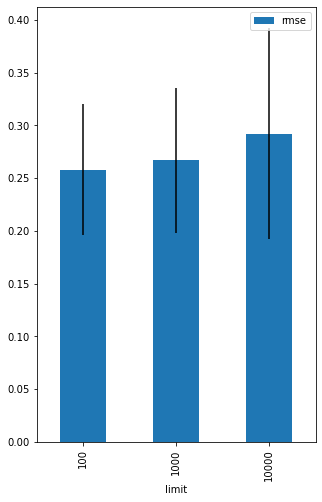

In [104]:
# Find the mean RMSE and std BY limit
mean_by_limit, std_by_limit = mean_std_by("limit")
mean_by_limit.plot(figsize=(5,8), kind="bar", yerr=std_by_limit)

<AxesSubplot:xlabel='target'>

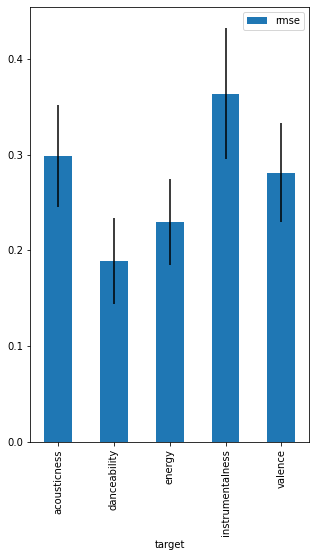

In [105]:
# Find the mean RMSE and std BY target
mean_by_target, std_by_target = mean_std_by("target", columns=["rmse", "model"])
mean_by_target.plot(figsize=(5,8), kind="bar", yerr=std_by_target)

<AxesSubplot:xlabel='model'>

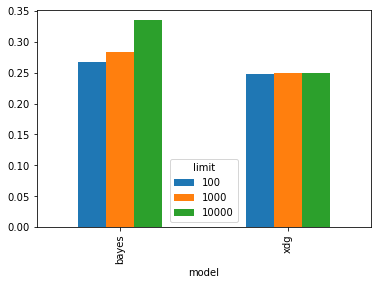

In [120]:
results[["rmse", "model", "limit"]].groupby(["limit", "model"]).mean().reset_index().pivot(index="model",columns="limit", values="rmse").plot(kind="bar")